In [14]:
import pandas as pd
import math
import numpy as np
from matplotlib import pyplot as plt
import japanize_matplotlib
import os

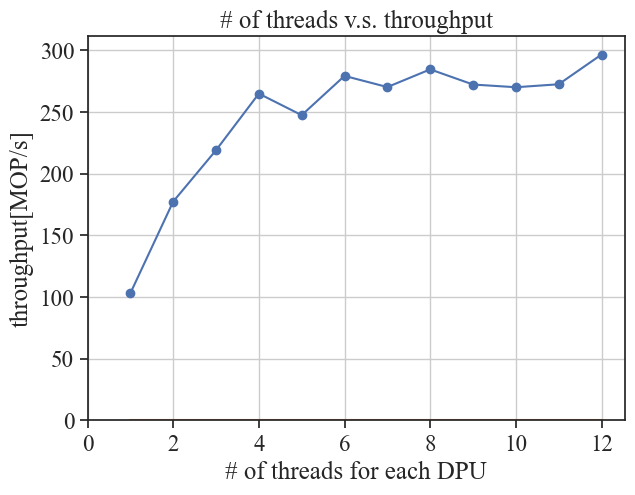

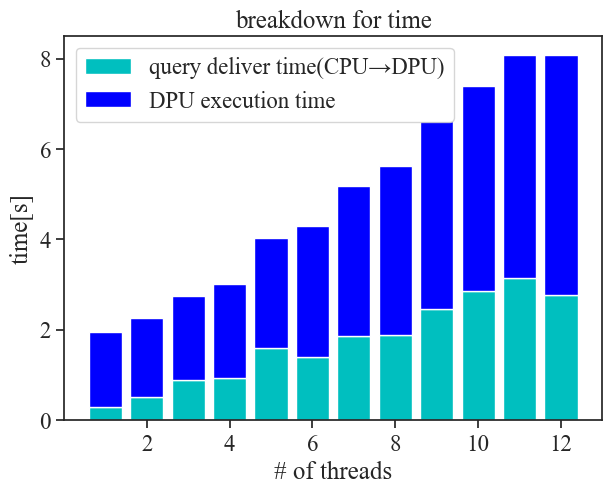

In [18]:
#予備実験(均一なワークロードに対する結果)
def makefigure_taskletnum_time():
    x_axis = []
    time_sendreq = []
    time_dpuexe = []
    df = pd.read_csv("../data_reproduced/taskletnum_upmem.csv")
    time_sendreq += df[' time_sendrequests[s]'].values.tolist()
    time_dpuexe += df[' time_dpu_execution[s]'].values.tolist()
    x_axis += df['num of tasklets'].values.tolist()
    fig = plt.figure()
    plt.rcParams["font.size"] = 18
    plt.rcParams["savefig.dpi"] = 300
    plt.title("breakdown for time")
    plt.xlabel('# of threads')
    plt.ylabel('time[s]')
    plt.bar(x_axis, time_sendreq, label="query deliver time(CPU→DPU)",align="center", color = "c")
    plt.bar(x_axis, time_dpuexe, label="DPU execution time",align="center", color = "b",bottom=time_sendreq)  
    plt.ylim(0,)
    #plt.xscale('log')
    #plt.xticks([1000]+x_axis[6:],["1000"]+[str(num) for num in x_axis[6:]])
    #plt.yscale('log')
    plt.legend()
    #plt.grid()
    fig.subplots_adjust(bottom=0.13,left=0.15,top=0.93,right=0.99)
    plt.savefig("../graphs_reproduced/num_of_tasklets_time.png",transparent = True)
    plt.show()
def makefigure_taskletnum():
    x_axis = []
    throughput = []
    throughput_skew = []
    df = pd.read_csv("../data_reproduced/taskletnum_upmem.csv")
    #result += df['Time'].values.tolist()
    throughput += df[' throughput[OPS/s]'].values.tolist()
    for i in range (0, len(throughput)):
        throughput[i] = throughput[i]/1000000.0
        throughput_skew.append(0.040306)
    x_axis += df['num of tasklets'].values.tolist()
    fig = plt.figure()
    plt.rcParams["font.size"] = 18
    plt.rcParams["savefig.dpi"] = 300
    plt.title("# of threads v.s. throughput")
    plt.xlabel('# of threads for each DPU')
    plt.ylabel('throughput[MOP/s]')
    plt.plot(x_axis, throughput, marker='o')
    plt.plot(x_axis, throughput_skew)
    plt.xlim(0,)
    plt.ylim(0,)
    #plt.xscale('log')
    #plt.xticks([1000]+x_axis[6:],["1000"]+[str(num) for num in x_axis[6:]])
    #plt.yscale('log')
    plt.grid()
    fig.subplots_adjust(bottom=0.13,left=0.15,top=0.93,right=0.99)
    plt.savefig("../graphs_reproduced/num_of_tasklets.png",transparent = True)
    plt.show()
makefigure_taskletnum()
makefigure_taskletnum_time()

In [22]:
#配置を変えたときの最大スループット
import seaborn as sns
ins1get1 =  [66]
ins1get19 = [204]

zipf_const = ["0", "0.6", "0.99", "1.2"]
cyclic = ["cyclic_"]
work_load = ["w05r95", "w50r50"]
x = [4,16,64,256,512,1024,1536,2047]
y = [16,32,64,256,512,1024]
X,Y = np.meshgrid(x,y)
plt.rcParams["savefig.dpi"] = 300
for a in zipf_const:
    for b in cyclic:
        for c in work_load:
            throughput = []
            num_dpus_redundant = []
            num_CPU_Trees = []
            df = pd.read_csv("../data_reproduced/" + b + "redundant_num_bptree_in_cpu_alpha" + a + "_" + c + ".csv")
            throughput += df[' throughput'].values.tolist()[:48]
            num_dpus_redundant += df[' num_dpus_redundant'].values.tolist()[:48]
            num_CPU_Trees += df[' num_CPU_Trees'].values.tolist()[:48]
            max_throughput = 0
            max_i = 0
            for i in range (0, len(throughput)):
                throughput[i] = throughput[i]/1000000.0
                if(max_throughput < throughput[i]):
                    max_throughput = throughput[i]
                    max_i = i
            if(work_load=="w05r95"):
                ins1get19.append(max_throughput)
            else:
                ins1get1.append(max_throughput)
                
            print("alpha=" +a + ", cyclic=" + b + ", work_load=" + c + ": max_throughput=" + str(max_throughput) + ", num_dpus_redundant=" + str(num_dpus_redundant[max_i])+ ", num_CPU_Trees="  + str(num_CPU_Trees[max_i]))
sns.set(context='notebook', style='ticks', palette='deep', font='Times New Roman', font_scale=1.5, color_codes=False, rc=None)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 18
x_datas = [0,0.6,0.99,1.2]
fig, ax = plt.subplots()
bar_width = 0.25
alpha = 0.8
index = np.arange(5)
plt.bar(index, ins1get1, bar_width,
alpha=alpha,color='green',label='insert:get = 1:1')
plt.bar(index + bar_width, ins1get19, bar_width,
alpha=alpha,color='pink',label='insert:get = 1:19')
plt.ylabel('Throughput (MOPS/s)')
ax.grid(axis='y')
plt.xticks(index + bar_width/2, ('CPU\n','Proposed\n α=0', 'Proposed\n α=0.6', 'Proposed\n α=0.99', 'Proposed\n α=1.2'))
plt.legend()
#ax.set_xlim(-0.2, 1.4)
#ax.set_ylim(0, 650)
#ax.set_xlabel('zipfian定数')
#ax.set_ylabel('スループット')
#ax.set_facecolor((1,1,1,0))
#plt.grid(True)
#plt.legend(loc = 'upper right')
plt.savefig('../graphs_reproduced/maximum_throughput.png')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../data_reproduced/cyclic_redundant_num_bptree_in_cpu_alpha0_w05r95.csv'

In [ ]:
#配置とスループットの関係
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import japanize_matplotlib
def makefigure_cyclic_slide():
    zipf_const = ["0", "0.6", "0.99", "1.2"]
    cyclic = ["cyclic_",""]
    work_load = ["w05r95", "w50r50"]
    num_DPUs = 2048
    num_tasklets = 10
    num_CPU_trees = [16,32,64,256,512,1024] #X
    num_first_class_DPUs = [4,16,64,256,512,1024,1536,2047] #Y
    X = np.zeros((len(num_CPU_trees), len(num_first_class_DPUs))) #CPU_trees/total_trees
    Y = np.zeros((len(num_CPU_trees), len(num_first_class_DPUs))) #First-class_DPUs/total_DPUs
    Num_totaltrees = np.zeros((len(num_CPU_trees), len(num_first_class_DPUs)))
    for i in range(len(num_CPU_trees)):
        for j in range(len(num_first_class_DPUs)):
            Num_totaltrees[i][j] = num_CPU_trees[i] + num_first_class_DPUs[j] + (num_DPUs - num_first_class_DPUs[j]) * num_tasklets
            X[i][j] = num_CPU_trees[i]
            Y[i][j] = 100 * num_first_class_DPUs[j] / num_DPUs
    plt.rcParams["savefig.dpi"] = 300
    for a in zipf_const:
        for b in cyclic:
            for c in work_load:
                throughput = []
                cpu_percent = []
                df = pd.read_csv("../data_reproduced/" + b + "redundant_num_bptree_in_cpu_alpha" + a + "_" + c + ".csv")
                #sns.set(context='talk', style='ticks', palette='deep', font='Times New Roman', font_scale=1, color_codes=False, rc=None)
                #plt.rcParams["font.family"] = "Meiryo"
                plt.rcParams["font.size"] = 24
                fig, ax = plt.subplots()
                #fig.subplots_adjust(left=0.15, bottom=0.18,right=1,top=0.98)
                #result += df['Time'].values.tolist()
                throughput += df[' throughput'].values.tolist()[:48]
                for i in range (0, len(throughput)):
                    throughput[i] = throughput[i]/1000000.0
                Z = np.reshape(throughput,[6,8])
                cpu_percent += df[' exec_time_{cpu/(cpu&dpu)}[%]'].values.tolist()
                #cont = ax.contour(X, Y, Z, colors = 'black')
                #ax.clabel(cont, inline=True, inline_spacing=5, fontsize=12)
                contf = ax.contourf(X, Y, Z, cmap = 'Blues')
                cbar = fig.colorbar(contf)
                #cbar.ax.set_ylabel('スループット (MOPS/s)')
                #cbar.add_lines(cont)

                plt.xlabel('# of trees in CPU($N_{c}$)',fontsize=30)
                #ax.set_ylabel("first-class PIMノード\nの割合($r_{f}$[%])",fontsize=28)
                #ax.plot(x_axis, throughput, marker='o', label="Zipfian Const=" + a)
                #plt.xlim(0,5)
                #plt.ylim(0,)

                #ax.set_xticks(x)
                #ax.set_yticks(y)
                #ax.set_xscale('log')
                #ax.set_yscale('log')
                plt.grid(c='lightgray', linewidth=1)
                #plt.legend()
                #plt.tick_params(labelsize=24)
                #fig.subplots_adjust(left=0.22)
                fig.subplots_adjust(bottom=0.19)
                plt.savefig("../graphs_reproduced/" + b + "redundant_alpha" + a + "_" + c + "_slide_no_yaxlabel.png",transparent = True)
                plt.show()
makefigure_cyclic_slide()